# Cipla Machine Learning Hiring Challenge

<p align="center">
    <img src="https://mma.prnewswire.com/media/947146/Cipla_Logo.jpg?p=twitter" width="500" height="600">
</p>

Cipla is a global pharmaceutical company that uses cutting-edge technology and innovation to meet the everyday needs of all patients. For over 80 years, Cipla has emerged as one of the most respected pharmaceutical names in India as well as across more than 100 countries. Our portfolio includes over 1000 products across a wide range of therapeutic categories with one quality standard globally.

Chellenge Link : https://assessment.hackerearth.com/challenges/hiring/cipla-data-scientist-hiring-challenge/

## Environment setup

In [29]:
# Data manipulation libararies
import pandas as pd
import numpy as np

# Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# sklearn libraries
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.metrics import r2_score

# Machine Learning libraries
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score

## Data gathering

In [30]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

sample_submission_df = pd.read_csv('data/sample_submission.csv')

cust_id = test_df['Customer ID']

In [31]:
train_df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [32]:
test_df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,...,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,...,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,...,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,...,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,...,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908.0


In [33]:
sample_submission_df.head()

,Customer ID,Loan Sanction Amount (USD)
0,C-36995,54607.18
1,C-33999,37469.98
2,C-3770,36474.43
3,C-26480,56040.54
4,C-23459,74008.28


## Exploratory data analysis

In [34]:
train_df.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,30000.000000,2.515000e+04,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,501.934700,2.631119e+03,2.460067,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,288.158086,1.132268e+04,1.118562,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,251.000000,1.650450e+03,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,504.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,751.000000,3.091408e+03,3.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


In [35]:
# Some columns have -999, which probably means some sort of discepency in data
train_df.replace(-999, np.nan, inplace=True)
test_df.replace(-999, np.nan, inplace=True)
test_df.replace('?', np.nan, inplace=True)

In [36]:
test_df.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type
count,20000.000000,19250.000000,20000.000000,19917.000000,18858.000000,19257.000000,20000.000000,20000.000000,19108.000000,20000.00000
mean,39.940500,2536.995394,88859.076706,408.462359,2.251246,738.821538,0.189500,501.024500,2534.102003,2.47190
std,16.097618,1415.908803,60007.333673,215.846532,0.953153,72.406504,0.391915,287.537722,1408.509255,1.12551
min,18.000000,368.590000,6185.480000,41.370000,1.000000,580.040000,0.000000,1.000000,368.590000,1.00000
25%,25.000000,1659.722500,40889.030000,250.890000,2.000000,680.300000,0.000000,252.000000,1658.397500,1.00000
50%,40.000000,2224.590000,74565.990000,374.000000,2.000000,739.300000,0.000000,501.000000,2220.605000,2.00000
75%,55.000000,3082.925000,120068.852500,519.570000,3.000000,797.440000,0.000000,748.000000,3082.250000,3.00000
max,65.000000,30427.680000,576335.680000,3305.970000,13.000000,893.830000,1.000000,999.000000,30427.680000,4.00000


In [37]:
# Checking for Null values
(train_df.isnull().sum() * 100) / len(train_df)

Customer ID                     0.000000
Name                            0.000000
Gender                          0.176667
Age                             0.000000
Income (USD)                   15.253333
Income Stability                5.610000
Profession                      0.000000
Type of Employment             24.233333
Location                        0.000000
Loan Amount Request (USD)       0.000000
Current Loan Expenses (USD)     1.163333
Expense Type 1                  0.000000
Expense Type 2                  0.000000
Dependents                      8.310000
Credit Score                    5.676667
No. of Defaults                 0.000000
Has Active Credit Card          5.220000
Property ID                     0.000000
Property Age                   16.166667
Property Type                   0.000000
Property Location               1.186667
Co-Applicant                    0.560000
Property Price                  1.173333
Loan Sanction Amount (USD)      2.260000
dtype: float64

In [38]:
train_df['No. of Defaults'].value_counts()

0    24182
1     5818
Name: No. of Defaults, dtype: int64

In [39]:
# Checking for Null values
(test_df.isnull().sum() * 100) / len(test_df)

Customer ID                     0.000
Name                            0.000
Gender                          0.155
Age                             0.000
Income (USD)                    3.750
Income Stability                4.065
Profession                      0.000
Type of Employment             23.445
Location                        0.000
Loan Amount Request (USD)       0.000
Current Loan Expenses (USD)     0.415
Expense Type 1                  0.000
Expense Type 2                  0.000
Dependents                      5.710
Credit Score                    3.715
No. of Defaults                 0.000
Has Active Credit Card          5.380
Property ID                     0.000
Property Age                    4.460
Property Type                   0.000
Property Location               0.800
Co-Applicant                    0.385
Property Price                  0.840
dtype: float64

In [40]:
# Creating a copy of the dataframe by removing the null columns of target

train_df_ = train_df[train_df['Loan Sanction Amount (USD)'].notna()]

# Separating target and features column

X = train_df_.drop('Loan Sanction Amount (USD)', axis=1)
target = train_df_['Loan Sanction Amount (USD)']

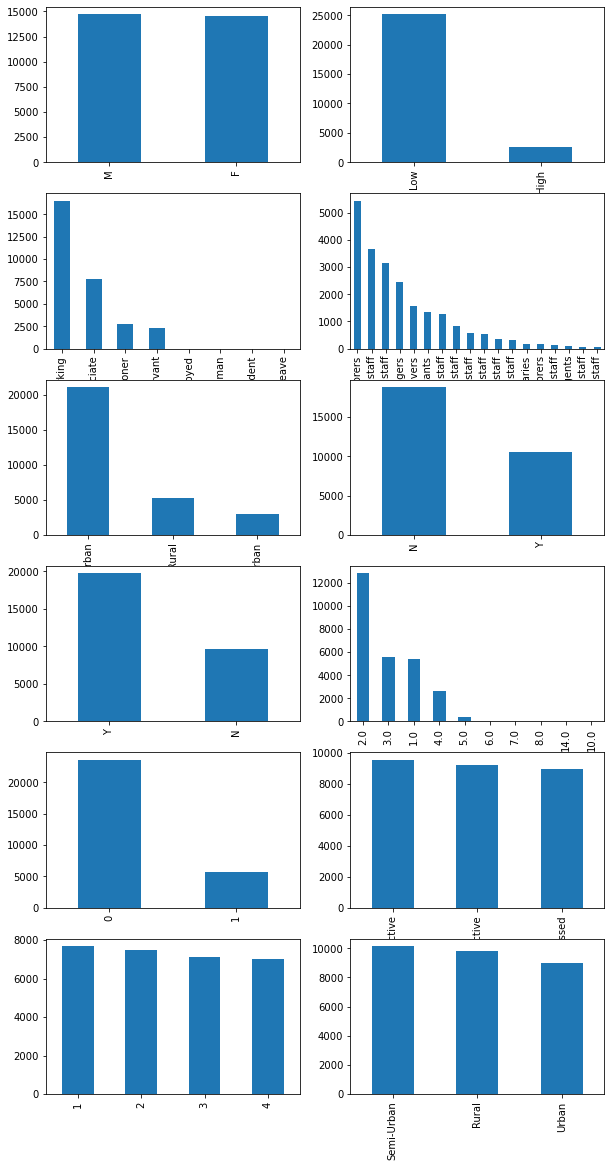

In [41]:
fig, a = plt.subplots(6, 2, figsize=(10,20))

X['Gender'].value_counts().plot(kind='bar', ax=a[0,0])
X['Income Stability'].value_counts().plot(kind='bar', ax=a[0][1])
X['Profession'].value_counts().plot(kind='bar', ax=a[1][0])
X['Type of Employment'].value_counts().plot(kind='bar', ax=a[1][1])
X['Location'].value_counts().plot(kind='bar', ax=a[2][0])
X['Expense Type 1'].value_counts().plot(kind='bar', ax=a[2][1])
X['Expense Type 2'].value_counts().plot(kind='bar', ax=a[3][0])
X['Dependents'].value_counts().plot(kind='bar', ax=a[3][1])
X['No. of Defaults'].value_counts().plot(kind='bar', ax=a[4][0])
X['Has Active Credit Card'].value_counts().plot(kind='bar', ax=a[4][1])
X['Property Type'].value_counts().plot(kind='bar', ax=a[5][0])
X['Property Location'].value_counts().plot(kind='bar', ax=a[5][1])

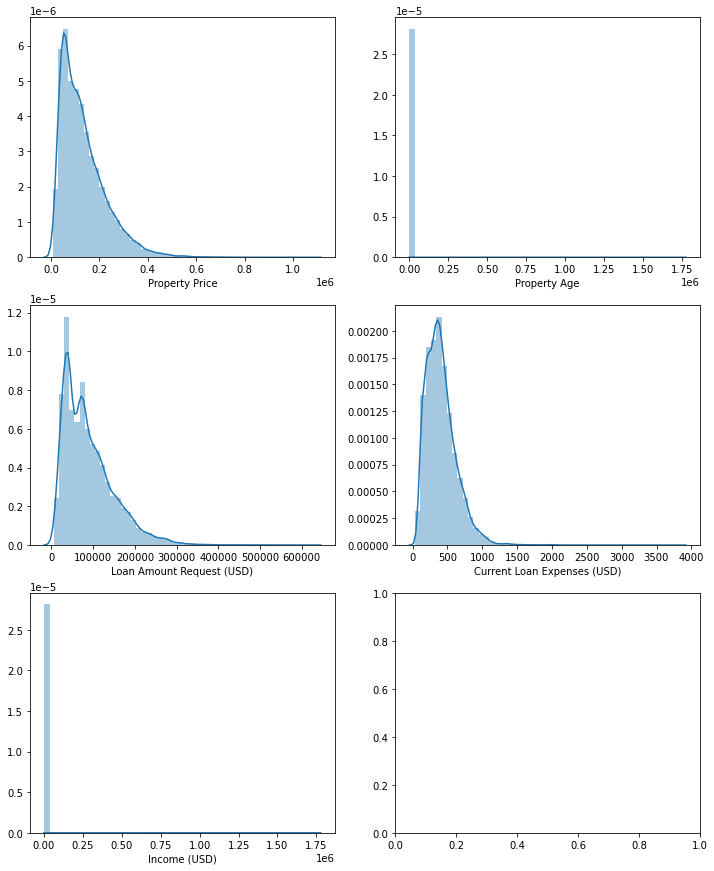

In [42]:
# Visualization of skewness
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
sns.distplot(ax=axes[0][0], a=X['Property Price'])
sns.distplot(ax=axes[0][1], a=X['Property Age'])
sns.distplot(ax=axes[1][0], a=X['Loan Amount Request (USD)'])
sns.distplot(ax=axes[1][1], a=X['Current Loan Expenses (USD)'])
sns.distplot(ax=axes[2][0], a=X['Income (USD)'])

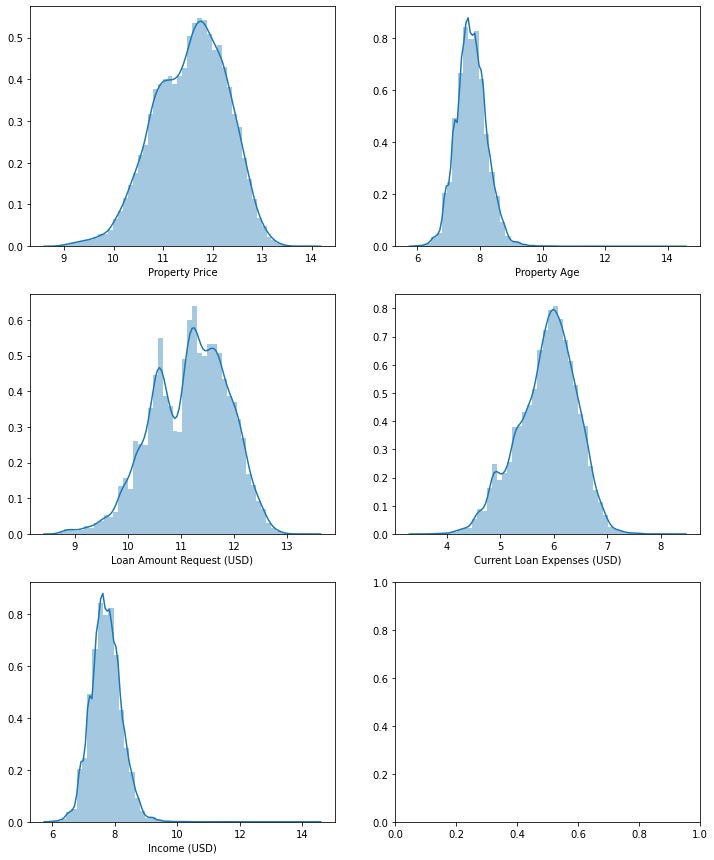

In [43]:
# Visualization of after log
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
sns.distplot(ax=axes[0][0], a=np.log(X['Property Price']))
sns.distplot(ax=axes[0][1], a=np.log(X['Property Age']))
sns.distplot(ax=axes[1][0], a=np.log(X['Loan Amount Request (USD)']))
sns.distplot(ax=axes[1][1], a=np.log(X['Current Loan Expenses (USD)']))
sns.distplot(ax=axes[2][0], a=np.log(X['Income (USD)']))

## Data preprocessing

### Dropping columns

In [44]:
# Dropping unnecessary columns
drop_cols = ['Customer ID', 'Name', 'Property ID']

X = X.drop(drop_cols, axis=1)
test_df = test_df.drop(drop_cols, axis=1)

### Converting columns to 'Category'

In [45]:
test_df['Co-Applicant'] = test_df['Co-Applicant'].astype('float')

# Converting columns to category type
cat_cols = [] # List to store the categorical columns
for lab, content in X.items():
    if pd.api.types.is_string_dtype(content):
        cat_cols.append(lab)

cat_cols = cat_cols + ['Property Type', 'Co-Applicant', 'No. of Defaults']

for lab in cat_cols:
    X[lab] = X[lab].astype("category")
    test_df[lab] = test_df[lab].astype("category")
    
numerical_cols = [] # List to store the numerical columns
for lab in X.columns:
    if lab not in cat_cols:
        numerical_cols.append(lab)

test_df['Property Price'] = test_df['Property Price'].astype("float")

In [46]:
X['Co-Applicant']

C:\Users\neela\AppData\Roaming\Python\Python38\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


0        1.0
1        1.0
2        0.0
3        1.0
4        1.0
        ... 
29995    1.0
29996    1.0
29997    1.0
29998    1.0
29999    1.0
Name: Co-Applicant, Length: 29322, dtype: category
Categories (2, float64): [0.0, 1.0]

### Filling null values

In [47]:
# Filling null values
for lab in cat_cols:
    X[lab] = X[lab].fillna(X[lab].mode()[0])
    test_df[lab] = test_df[lab].fillna(test_df[lab].mode()[0])
    
for lab in numerical_cols:
    X[lab] = X[lab].fillna(X[lab].median())
    test_df[lab] = test_df[lab].fillna(test_df[lab].median())

In [48]:
test_df.isnull().sum()

Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
dtype: int64

In [49]:
X.isnull().sum()

Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
dtype: int64

### Converting columns using 'np.log()'

In [50]:
# Converting to log
X['Property Price'] = np.log(X['Property Price'])
X['Property Age'] = np.log(X['Property Age'])
X['Loan Amount Request (USD)'] = np.log(X['Loan Amount Request (USD)'])
X['Current Loan Expenses (USD)'] = np.log(X['Current Loan Expenses (USD)'])
X['Income (USD)'] = np.log(X['Income (USD)'])

# Converting to log
test_df['Property Price'] = np.log(test_df['Property Price'])
test_df['Property Age'] = np.log(test_df['Property Age'])
test_df['Loan Amount Request (USD)'] = np.log(test_df['Loan Amount Request (USD)'])
test_df['Current Loan Expenses (USD)'] = np.log(test_df['Current Loan Expenses (USD)'])
test_df['Income (USD)'] = np.log(test_df['Income (USD)'])

### Encoding and scaling columns

In [51]:
ord_encoder = OrdinalEncoder()
minmax_scaler = MinMaxScaler()

# Encoding the categorical columns
for cat in cat_cols:
    print("Fitting: "+cat)
    label_fit = ord_encoder.fit(np.array(X[cat]).reshape(-1, 1))
    X[cat] = ord_encoder.transform(np.array(X[cat]).reshape(-1, 1))
    test_df[cat] = ord_encoder.transform(np.array(test_df[cat]).reshape(-1, 1))

# Normalizing numerical columns
scaler_fit = minmax_scaler.fit(X[numerical_cols])
X[numerical_cols] = scaler_fit.transform(X[numerical_cols])
test_df[numerical_cols] = scaler_fit.transform(test_df[numerical_cols])

Fitting: Gender
Fitting: Income Stability
Fitting: Profession
Fitting: Type of Employment
Fitting: Location
Fitting: Expense Type 1
Fitting: Expense Type 2
Fitting: Has Active Credit Card
Fitting: Property Location
Fitting: Property Type
Fitting: Co-Applicant
Fitting: No. of Defaults


In [52]:
test_df.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,0.0,0.617021,0.262350,1.0,1.0,10.0,1.0,0.673708,0.520461,0.0,0.0,0.076923,0.692911,0.0,2.0,0.262350,1.0,2.0,1.0,0.696723
1,0.0,0.829787,0.135192,1.0,7.0,14.0,0.0,0.615672,0.553441,1.0,1.0,0.076923,0.800955,0.0,2.0,0.135192,0.0,0.0,1.0,0.595072
2,0.0,0.723404,0.143052,1.0,7.0,8.0,1.0,0.728483,0.566421,0.0,1.0,0.153846,0.150003,0.0,2.0,0.143052,0.0,2.0,1.0,0.744831
3,1.0,1.000000,0.152338,0.0,3.0,8.0,0.0,0.599054,0.545264,0.0,1.0,0.076923,0.800607,0.0,1.0,0.152338,0.0,1.0,0.0,0.570042
4,0.0,0.893617,0.193452,0.0,3.0,8.0,2.0,0.626145,0.505789,0.0,0.0,0.076923,0.503699,0.0,0.0,0.193452,3.0,1.0,1.0,0.643005


In [53]:
X.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,0.0,0.808511,0.193075,1.0,7.0,14.0,1.0,0.537108,0.415247,0.0,0.0,0.153846,0.725479,0.0,0.0,0.193075,3.0,0.0,1.0,0.560789
1,1.0,0.297872,0.304334,1.0,7.0,8.0,1.0,0.441873,0.567557,0.0,1.0,0.000000,0.633656,0.0,2.0,0.304334,1.0,0.0,1.0,0.404095
2,0.0,1.000000,0.113731,0.0,3.0,8.0,1.0,0.436060,0.343867,0.0,1.0,0.000000,0.800449,0.0,2.0,0.113731,1.0,2.0,0.0,0.459947
3,0.0,1.000000,0.209594,0.0,3.0,8.0,0.0,0.557595,0.460402,0.0,1.0,0.076923,0.799026,1.0,2.0,0.209634,1.0,1.0,1.0,0.563288
4,0.0,0.276596,0.228796,1.0,7.0,6.0,1.0,0.633627,0.565674,0.0,1.0,0.076923,0.523462,1.0,0.0,0.228796,3.0,1.0,1.0,0.671462


## Model experimentation

In [54]:
np.random.seed(42)
import time
# Create a dictionary of the models to experiment
models = {
          "RFC" : RandomForestRegressor(n_jobs=-1),
          "XGB" : XGBRegressor(n_jobs=-1),
          "CatB": CatBoostRegressor(),
          "GB"  : GradientBoostingRegressor(),
          "ADA" : AdaBoostRegressor(),
          "LGB" : LGBMRegressor(),
         }

# Create a function to fit and score the models
def fit_and_score(models, X, y):
    '''
    Fits and evaluates the machine learning models.
    models : a dict of different Scikit-Learn machine learning models.
    X_train : training data (no labels)
    y_train : training lables
    X_test : testing data (no labels)
    y_test : testing lables
    '''
    model_scores = {}
    model_timing = {}
    for name, model in models.items():
        start = time.time()
        model_scores[name] = np.mean(cross_val_score(model, X, y, cv=10, n_jobs=-1, scoring='r2')) * 100
        stop = time.time()
        timing = stop - start
        model_timing[name] = timing
    # Create dictionary for oil scores
    scores = {'R2_score': model_scores,
              'Timing(s)': model_timing
             }

    # Create dataframe of scores
    scores_df = pd.DataFrame(scores)

    scores_df.rename_axis('Model', inplace=True)
    scores_df.reset_index(inplace=True)
    scores_df.sort_values('R2_score', ascending=False, inplace=True)
    return scores_df

In [27]:
np.random.seed(42)
score_df = fit_and_score(models, X, target)
score_df

,Model,R2_score,Timing(s)
5,LGB,79.563151,2.516230
2,CatB,79.396659,117.381067
0,RFC,78.371205,56.546801
1,XGB,78.301539,18.038719
3,GB,78.164142,17.636831
4,ADA,51.968514,5.171207


In [28]:
sample_submission_df.head()

,Customer ID,Loan Sanction Amount (USD)
0,C-36995,54607.18
1,C-33999,37469.98
2,C-3770,36474.43
3,C-26480,56040.54
4,C-23459,74008.28


In [56]:
def submission(models, X, target, test_df):
    counter = 0
    for name, model in models.items():
        model.fit(X, target)
        pred = model.predict(test_df)
        subm = pd.DataFrame()
        subm['Customer ID'] = cust_id
        subm['Loan Sanction Amount (USD)'] = pred
        subm.to_csv('submission/submission_'+name+'_'+str(counter)+'.csv', index=False)
        counter = counter + 1

In [57]:
submission(models, X, target, test_df)

Learning rate set to 0.071213
0:	learn: 46016.0589238	total: 147ms	remaining: 2m 26s
1:	learn: 43835.7964875	total: 154ms	remaining: 1m 16s
2:	learn: 41905.3247813	total: 161ms	remaining: 53.7s
3:	learn: 40103.8633528	total: 169ms	remaining: 42s
4:	learn: 38430.8099954	total: 177ms	remaining: 35.2s
5:	learn: 36896.2692645	total: 186ms	remaining: 30.9s
6:	learn: 35495.6563910	total: 196ms	remaining: 27.8s
7:	learn: 34201.0933409	total: 203ms	remaining: 25.2s
8:	learn: 33035.3573386	total: 211ms	remaining: 23.2s
9:	learn: 31944.3483760	total: 221ms	remaining: 21.9s
10:	learn: 30967.4872093	total: 230ms	remaining: 20.7s
11:	learn: 30099.9652226	total: 238ms	remaining: 19.6s
12:	learn: 29286.6944065	total: 246ms	remaining: 18.6s
13:	learn: 28614.9979209	total: 254ms	remaining: 17.9s
14:	learn: 27941.4886738	total: 262ms	remaining: 17.2s
15:	learn: 27344.4949639	total: 270ms	remaining: 16.6s
16:	learn: 26797.9984836	total: 278ms	remaining: 16.1s
17:	learn: 26327.3384631	total: 286ms	remaini

165:	learn: 20531.9749977	total: 1.6s	remaining: 8.02s
166:	learn: 20525.7109784	total: 1.6s	remaining: 8.01s
167:	learn: 20510.5660723	total: 1.61s	remaining: 7.99s
168:	learn: 20505.6927377	total: 1.62s	remaining: 7.98s
169:	learn: 20498.4537349	total: 1.63s	remaining: 7.96s
170:	learn: 20487.2732591	total: 1.64s	remaining: 7.94s
171:	learn: 20480.5850098	total: 1.65s	remaining: 7.92s
172:	learn: 20466.6146486	total: 1.65s	remaining: 7.91s
173:	learn: 20458.1633555	total: 1.66s	remaining: 7.9s
174:	learn: 20448.0987143	total: 1.67s	remaining: 7.89s
175:	learn: 20441.8182984	total: 1.68s	remaining: 7.89s
176:	learn: 20432.5763084	total: 1.69s	remaining: 7.88s
177:	learn: 20428.2806283	total: 1.7s	remaining: 7.87s
178:	learn: 20419.2594053	total: 1.71s	remaining: 7.86s
179:	learn: 20411.0151491	total: 1.73s	remaining: 7.87s
180:	learn: 20400.7130021	total: 1.74s	remaining: 7.86s
181:	learn: 20390.1374753	total: 1.75s	remaining: 7.85s
182:	learn: 20383.1590681	total: 1.76s	remaining: 7.

312:	learn: 19488.3067002	total: 3.01s	remaining: 6.6s
313:	learn: 19485.1918324	total: 3.02s	remaining: 6.59s
314:	learn: 19475.1801498	total: 3.03s	remaining: 6.58s
315:	learn: 19471.7260380	total: 3.04s	remaining: 6.57s
316:	learn: 19464.7752927	total: 3.05s	remaining: 6.58s
317:	learn: 19458.7007107	total: 3.06s	remaining: 6.56s
318:	learn: 19445.6817874	total: 3.07s	remaining: 6.55s
319:	learn: 19440.6898247	total: 3.08s	remaining: 6.54s
320:	learn: 19434.6546184	total: 3.08s	remaining: 6.53s
321:	learn: 19427.0018548	total: 3.09s	remaining: 6.51s
322:	learn: 19422.4289405	total: 3.1s	remaining: 6.5s
323:	learn: 19416.1366383	total: 3.11s	remaining: 6.48s
324:	learn: 19407.8514113	total: 3.12s	remaining: 6.48s
325:	learn: 19403.0557176	total: 3.13s	remaining: 6.47s
326:	learn: 19394.7608939	total: 3.13s	remaining: 6.45s
327:	learn: 19390.7314776	total: 3.14s	remaining: 6.44s
328:	learn: 19379.6666060	total: 3.15s	remaining: 6.43s
329:	learn: 19372.6032994	total: 3.16s	remaining: 6

468:	learn: 18610.4155272	total: 4.24s	remaining: 4.8s
469:	learn: 18606.1744897	total: 4.25s	remaining: 4.79s
470:	learn: 18599.1259461	total: 4.26s	remaining: 4.78s
471:	learn: 18589.4431102	total: 4.27s	remaining: 4.77s
472:	learn: 18583.7153460	total: 4.28s	remaining: 4.76s
473:	learn: 18580.6823167	total: 4.28s	remaining: 4.75s
474:	learn: 18577.4674821	total: 4.29s	remaining: 4.74s
475:	learn: 18574.0612398	total: 4.3s	remaining: 4.73s
476:	learn: 18569.1347273	total: 4.31s	remaining: 4.72s
477:	learn: 18563.2589236	total: 4.31s	remaining: 4.71s
478:	learn: 18557.9133121	total: 4.32s	remaining: 4.7s
479:	learn: 18554.5453349	total: 4.33s	remaining: 4.69s
480:	learn: 18552.7794752	total: 4.34s	remaining: 4.68s
481:	learn: 18549.8954129	total: 4.34s	remaining: 4.67s
482:	learn: 18543.0484058	total: 4.35s	remaining: 4.66s
483:	learn: 18536.4936572	total: 4.36s	remaining: 4.65s
484:	learn: 18533.4547228	total: 4.37s	remaining: 4.64s
485:	learn: 18527.2648025	total: 4.38s	remaining: 4

626:	learn: 17942.7371925	total: 5.46s	remaining: 3.25s
627:	learn: 17939.9685168	total: 5.47s	remaining: 3.24s
628:	learn: 17937.0264198	total: 5.48s	remaining: 3.23s
629:	learn: 17935.1669274	total: 5.49s	remaining: 3.22s
630:	learn: 17928.9061777	total: 5.5s	remaining: 3.21s
631:	learn: 17924.2432627	total: 5.5s	remaining: 3.2s
632:	learn: 17920.3034226	total: 5.51s	remaining: 3.2s
633:	learn: 17917.1254657	total: 5.52s	remaining: 3.19s
634:	learn: 17911.9140973	total: 5.53s	remaining: 3.18s
635:	learn: 17908.0197188	total: 5.54s	remaining: 3.17s
636:	learn: 17903.8021606	total: 5.55s	remaining: 3.16s
637:	learn: 17900.9585417	total: 5.56s	remaining: 3.15s
638:	learn: 17894.0338485	total: 5.57s	remaining: 3.15s
639:	learn: 17889.9704415	total: 5.58s	remaining: 3.14s
640:	learn: 17886.0429864	total: 5.59s	remaining: 3.13s
641:	learn: 17882.5898472	total: 5.6s	remaining: 3.12s
642:	learn: 17879.5433739	total: 5.61s	remaining: 3.12s
643:	learn: 17873.1100090	total: 5.62s	remaining: 3.1

780:	learn: 17378.8166742	total: 6.88s	remaining: 1.93s
781:	learn: 17376.9285273	total: 6.89s	remaining: 1.92s
782:	learn: 17373.1361400	total: 6.9s	remaining: 1.91s
783:	learn: 17369.5596102	total: 6.91s	remaining: 1.9s
784:	learn: 17368.4614287	total: 6.92s	remaining: 1.9s
785:	learn: 17365.6334510	total: 6.93s	remaining: 1.89s
786:	learn: 17363.9884359	total: 6.94s	remaining: 1.88s
787:	learn: 17360.0893049	total: 6.95s	remaining: 1.87s
788:	learn: 17356.0908119	total: 6.96s	remaining: 1.86s
789:	learn: 17353.8260188	total: 6.97s	remaining: 1.85s
790:	learn: 17350.0545763	total: 6.98s	remaining: 1.84s
791:	learn: 17346.4216546	total: 6.99s	remaining: 1.83s
792:	learn: 17340.2622763	total: 7s	remaining: 1.83s
793:	learn: 17336.1268098	total: 7.01s	remaining: 1.82s
794:	learn: 17332.7167935	total: 7.02s	remaining: 1.81s
795:	learn: 17330.2315341	total: 7.03s	remaining: 1.8s
796:	learn: 17326.1518750	total: 7.04s	remaining: 1.79s
797:	learn: 17323.0020204	total: 7.05s	remaining: 1.78s

928:	learn: 16901.1387426	total: 8.1s	remaining: 619ms
929:	learn: 16897.6922667	total: 8.11s	remaining: 610ms
930:	learn: 16893.8926944	total: 8.12s	remaining: 602ms
931:	learn: 16889.0985737	total: 8.13s	remaining: 593ms
932:	learn: 16885.6188329	total: 8.14s	remaining: 585ms
933:	learn: 16884.2803744	total: 8.15s	remaining: 576ms
934:	learn: 16881.1358707	total: 8.16s	remaining: 567ms
935:	learn: 16878.0569216	total: 8.17s	remaining: 558ms
936:	learn: 16874.9462391	total: 8.18s	remaining: 550ms
937:	learn: 16870.6002956	total: 8.19s	remaining: 541ms
938:	learn: 16868.5538186	total: 8.2s	remaining: 532ms
939:	learn: 16867.8498028	total: 8.2s	remaining: 524ms
940:	learn: 16864.4389850	total: 8.21s	remaining: 515ms
941:	learn: 16859.1737271	total: 8.22s	remaining: 506ms
942:	learn: 16856.3242388	total: 8.23s	remaining: 497ms
943:	learn: 16852.5496019	total: 8.24s	remaining: 489ms
944:	learn: 16850.2243974	total: 8.25s	remaining: 480ms
945:	learn: 16844.4182155	total: 8.26s	remaining: 4